In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Importing necessary libraries

In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing the dataset and describing the dataset

In [34]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv").drop(columns='CustomerID')
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.

# Label Encoding and Scaling the Data

In [35]:
mms=MinMaxScaler()
le=LabelEncoder()
numeric_cols=list(df.select_dtypes(include='int64').columns)
new_df=pd.DataFrame(mms.fit_transform(df[numeric_cols]),columns=numeric_cols)
new_df['Gender']=le.fit_transform(df['Gender'])

# Training the KMeans Model with 3 clusters

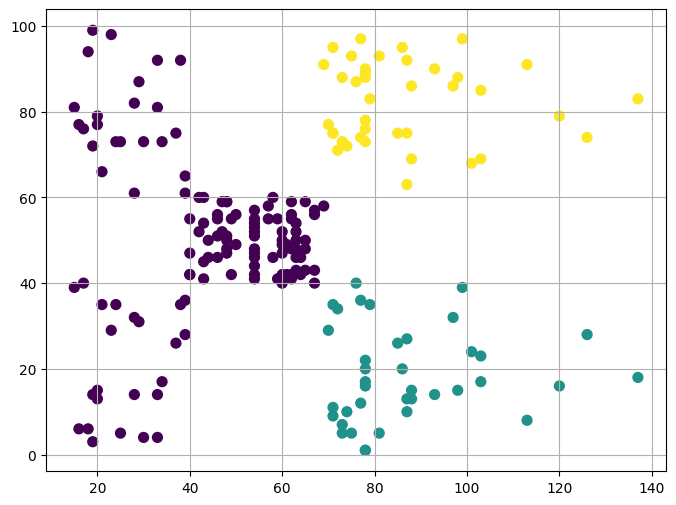

In [36]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
kmeans=KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(x)
plt.figure(figsize=(8, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],c=df['Cluster'],cmap='viridis',s=50)
plt.grid(True)
plt.show()

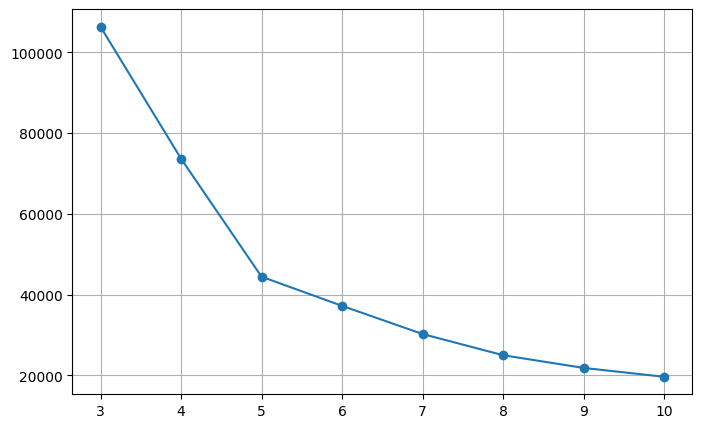

In [37]:
inertia=[]
for k in range(3,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(3,11), inertia, marker='o')
plt.grid(True)
plt.show()

# KMeans Clustering with optimal K (value=5)

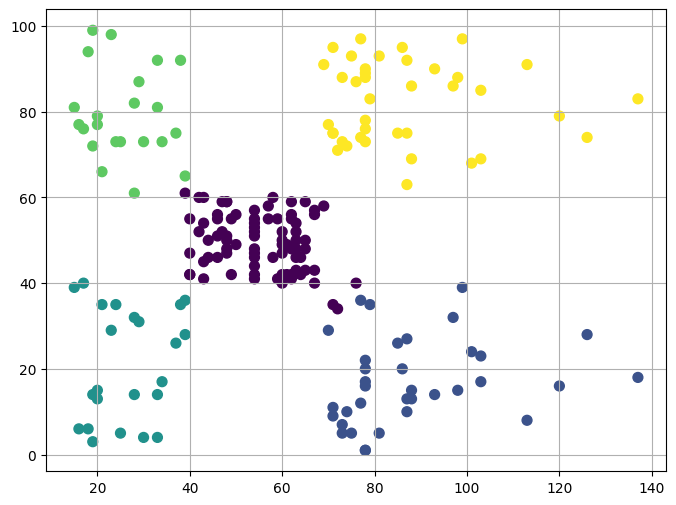



Silhouette Score: 0.553931997444648


In [38]:
kmeans=KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(x)
plt.figure(figsize=(8, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],c=df['Cluster'],cmap='viridis',s=50)
plt.grid(True)
plt.show()
print("\n")
labels=kmeans.labels_

sil_score=silhouette_score(x,labels)
print("Silhouette Score:",sil_score)